In [1]:
cd ../datasource/

/Users/liang/Documents/GitHub/datasource


In [2]:
ls

10k_articles.txt
80k.tar.gz
SourceHanSerifSC-Regular.otf
WikiCHModel
WikiCHModel.trainables.syn1neg.npy
WikiCHModel.wv.vectors.npy
WikiSimpleChineseModelFromLiang
WikiSimpleChineseModelFromLiang.trainables.syn1neg.npy
WikiSimpleChineseModelFromLiang.wv.vectors.npy
chinese_stopwords.txt
cut_zh_wiki_00
cut_zh_wiki_01
cut_zh_wiki_02
cut_zh_wiki_03
cut_zh_wiki_04
export_sql_1558435.zip
jb_wiki_00
jb_wiki_01
jb_wiki_02
jb_wiki_03
jb_wiki_04
jb_wiki_all
movie_comments.csv
readme.md
test.csv
train.csv
train.py
zhswiki_00
zhswiki_00tt
zhswiki_01
zhswiki_01tt
zhswiki_02
zhswiki_02tt
zhswiki_03
zhswiki_03tt
zhswiki_04
zhswiki_04tt


In [3]:
!less zhswiki_00tt

<doc id="13" url="https://zh.wikipedia.org/wiki?curid=13" title="数学">
数学

数学是利用符号语言研究数量、结构、变化以及空间等概念的一门学科，从某种角度看属于形式科学的一种。数学透过抽象化和逻辑推理的使用，由计数、计算、量度和对物体形状及运动的观察而产生。数学家们拓展这些概念，为了公式化新的猜想以及从选定的公理及定义中建立起严谨推导出的定理。

基础数学的知识与运用总是个人与团体生活中不可或缺的一环。对数学基本概念的完善，早在古埃及、美索不达米亚及古印度内的古代数学文本便可观见，而在古希腊那里有更为严谨的处理。从那时开始，数学的发展便持续不断地小幅进展，至16世纪的文艺复兴时期，因为新的科学发现和数学革新两者的交互，致使数学的加速发展，直至今日。数学并成为许多国家及地区的教育范畴中的一部分。

今日，数学使用在不同的领域中，包括科学、工程、医学、经济学和金融学等。数学对这些领域的应用通常被称为应用数学，有时亦会激起新的数学发现，并导致全新学科的发展，例如物理学的实质性发展中建立的某些理论激发数学家对于某些问题的不同角度的思考。数学家也研究纯数学，就是数学本身的实质性内容，而不以任何实际应用为目标。虽然许多研究以纯数学开始，但其过程中也发现许多应用之处。

数形式'，可溯至拉丁文的中性复数'，由西塞罗译自希腊文复数，此一希腊语被亚里士多德:

In [5]:
import jieba

In [6]:
def write_token_to_f(open_f,output_f):
    words=[]
    for line in open(open_f):
        w=list(jieba.cut(line))
        words+=w+['\n']
    output_f.writelines(''.join(words))

In [8]:
import time
import os
target_files=os.listdir()

In [9]:
len(target_files)

39

In [10]:
start=time.time()
with open('train_corpus.txt','w') as output_f:
    write_token_to_f('zhswiki_00tt',output_f)
end=time.time()
print('used time {}'.format(end-start))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/f1/s02h7_c152xbsy1b3cq00pr80000gn/T/jieba.cache
Loading model cost 0.601 seconds.
Prefix dict has been built succesfully.


used time 352.3637430667877


In [11]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [12]:
s=time.time()
mini_model=Word2Vec(LineSentence('train_corpus.txt'),min_count=5,size=20)
e=time.time()
print(e-s)

35.59118318557739


In [21]:
mini_model.wv['女儿']

array([-0.08449055, -0.0027524 , -0.11135045,  0.03225132, -0.00595582,
       -0.0068729 , -0.10293242, -0.00110029, -0.13889927, -0.02604817,
        0.0391532 ,  0.07257407, -0.02976795,  0.01664839,  0.03699335,
        0.05582036,  0.01283565,  0.10977858, -0.03625759, -0.00404657],
      dtype=float32)

In [22]:
mini_model.most_similar('女儿')

/Users/liang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('C#', 0.9751418828964233),
 ('GNOME', 0.9746345281600952),
 ('先进音影片编码', 0.9745826721191406),
 ('信用卡', 0.973792314529419),
 ('Philips', 0.9735254049301147),
 ('def', 0.9733522534370422),
 ('767', 0.9732984304428101),
 ('NVIDIA', 0.9732093811035156),
 ('第', 0.9727539420127869),
 ('|width=30%', 0.972740650177002)]

In [23]:
filename='cut_zh_wiki_00'
newfilename='jb_wiki_00'

In [24]:
all_content=open(filename,'r',encoding='utf-8')


In [25]:
all_content

<_io.TextIOWrapper name='cut_zh_wiki_00' mode='r' encoding='utf-8'>

In [26]:
i=0
import re
outfile=open(newfilename,'w',encoding='utf-8')
for line in all_content:
    #if i>50:break
#     if not len(line.strip()):
#         continue
#     else:
#     if line.strip():
    #line=line.strip()
    line=''.join(re.findall('[\u4e00-\u9fa5| ]+',line))
    if line:
        #print(line)
        outfile.writelines(line)
        outfile.writelines('\n')
    #print(line)
    #i=i+1
    
outfile.close()

In [27]:
import re
def transf(inputfile,outputfile):
    outfile=open(outputfile,'w',encoding='utf-8')
    with open(inputfile,'r',encoding='utf-8') as f:
        for line in f:
            line=''.join(re.findall('[\u4e00-\u9fa5| ]+',line))
            if line:
                outfile.writelines(line)
                outfile.writelines('\n')
    f.close()
    outfile.close()

In [28]:
ls

10k_articles.txt
80k.tar.gz
SourceHanSerifSC-Regular.otf
WikiCHModel
WikiCHModel.trainables.syn1neg.npy
WikiCHModel.wv.vectors.npy
WikiSimpleChineseModelFromLiang
WikiSimpleChineseModelFromLiang.trainables.syn1neg.npy
WikiSimpleChineseModelFromLiang.wv.vectors.npy
chinese_stopwords.txt
cut_zh_wiki_00
cut_zh_wiki_01
cut_zh_wiki_02
cut_zh_wiki_03
cut_zh_wiki_04
export_sql_1558435.zip
jb_wiki_00
jb_wiki_01
jb_wiki_02
jb_wiki_03
jb_wiki_04
jb_wiki_all
movie_comments.csv
readme.md
test.csv
train.csv
train.py
train_corpus.txt
zhswiki_00
zhswiki_00tt
zhswiki_01
zhswiki_01tt
zhswiki_02
zhswiki_02tt
zhswiki_03
zhswiki_03tt
zhswiki_04
zhswiki_04tt


transf('cut_zh_wiki_01','jb_wiki_01')
transf('cut_zh_wiki_02','jb_wiki_02')
transf('cut_zh_wiki_03','jb_wiki_03')
transf('cut_zh_wiki_04','jb_wiki_04')

In [32]:
from gensim.models import word2vec

model1 = word2vec.Word2Vec.load('./WikiCHModel')
model2= word2vec.Word2Vec.load('./WikiSimpleChineseModelFromLiang')

print(model1.wv.similarity('奥运会','金牌')) #两个词的相关性

print(model1.wv.most_similar(['伦敦','中国'],['北京'])) # 北京is to中国 as 伦敦is to？

0.6172311352593416
[('英国', 0.6514661312103271), ('欧洲', 0.6357942223548889), ('英格兰', 0.6027913689613342), ('澳洲', 0.6027244925498962), ('爱尔兰', 0.5738932490348816), ('北美', 0.5722094774246216), ('苏格兰', 0.5683449506759644), ('美洲', 0.5532093048095703), ('挪威', 0.548758864402771), ('澳大利亚', 0.5433457493782043)]


In [33]:
model1.wv['数字']

array([-7.3015648e-01,  1.3521255e+00, -1.5583268e+00,  5.5504704e-01,
        2.8623092e-01,  1.3290200e+00, -8.6190385e-01,  1.3007929e+00,
       -1.3232925e+00, -2.4858212e-01,  1.0224029e+00, -1.3977679e-02,
        1.2837071e+00, -4.4181317e-01,  4.9343112e-01,  2.2205017e-03,
       -2.3125064e+00, -6.8721914e-01,  1.7568803e+00, -4.9369898e-01,
        1.3140104e+00, -2.1848791e+00, -2.0801766e-01, -1.7905065e+00,
       -1.3594722e+00,  1.5213295e+00, -5.9920549e-01, -2.0124967e+00,
       -1.1936377e+00, -6.8066370e-01,  1.2132335e+00,  2.6035970e-01,
       -4.5804298e-01, -1.6739509e+00, -3.4261191e-01, -8.9301795e-01,
        9.7222000e-01,  1.9183612e-01,  3.5478685e-02,  6.5513802e-01,
       -1.2844632e+00,  5.7934277e-02, -4.6810251e-01, -2.2412404e-01,
        7.0918150e-02,  7.7385449e-01, -1.5813940e+00, -8.3267856e-01,
       -2.3143857e+00,  1.2621824e+00, -1.0917636e+00, -3.8385123e-01,
       -1.3404102e+00,  3.5688829e+00, -2.4959097e+00,  4.8147961e-01,
      

In [34]:
model1.wv.most_similar('数学')

[('微积分', 0.7721995711326599),
 ('概率论', 0.7711516618728638),
 ('几何学', 0.7397883534431458),
 ('数学分析', 0.7310914397239685),
 ('数论', 0.7296303510665894),
 ('算术', 0.7262723445892334),
 ('三角学', 0.7245255708694458),
 ('几何', 0.7186579704284668),
 ('拓扑学', 0.714956521987915),
 ('集合论', 0.7086565494537354)]

In [35]:
model2.wv.most_similar('数学')

[('微积分', 0.8040699362754822),
 ('数学分析', 0.784069836139679),
 ('算术', 0.7572104334831238),
 ('概率论', 0.7440682649612427),
 ('数理逻辑', 0.7317675352096558),
 ('数论', 0.7298519611358643),
 ('逻辑学', 0.7197368144989014),
 ('拓扑学', 0.7062894701957703),
 ('高等数学', 0.700884222984314),
 ('自然科学', 0.6989687085151672)]

In [36]:
model1.wv.most_similar('语文')

[('外语', 0.714436411857605),
 ('双语', 0.6945902109146118),
 ('文言文', 0.693080484867096),
 ('教材', 0.682099461555481),
 ('课本', 0.6796269416809082),
 ('国文', 0.6794532537460327),
 ('辞典', 0.656640350818634),
 ('英语教学', 0.6504800319671631),
 ('科目', 0.638746976852417),
 ('教学', 0.6369596719741821)]

In [37]:
model2.wv.most_similar('语文')

[('外语', 0.6801763772964478),
 ('语文科', 0.6671470403671265),
 ('外语教学', 0.665006160736084),
 ('英语教学', 0.6618272066116333),
 ('双语', 0.6614879369735718),
 ('通识', 0.650892972946167),
 ('国语文', 0.6503859758377075),
 ('教材', 0.635672926902771),
 ('语言文字', 0.6205281615257263),
 ('文言文', 0.6080657243728638)]

In [38]:
model1.wv.most_similar('习近平')

[('胡锦涛', 0.8864064812660217),
 ('江泽民', 0.838138222694397),
 ('赵紫阳', 0.7879905700683594),
 ('邓小平', 0.7730977535247803),
 ('温家宝', 0.7549408674240112),
 ('朱镕基', 0.7459585666656494),
 ('总书记', 0.743091344833374),
 ('胡耀邦', 0.7344706058502197),
 ('张德江', 0.7328690886497498),
 ('贾庆林', 0.7325227856636047)]

In [40]:
model2.wv.most_similar('习近平')

[('胡锦涛', 0.8701280951499939),
 ('江泽民', 0.8347151279449463),
 ('邓小平', 0.7453617453575134),
 ('温家宝', 0.7294594049453735),
 ('赵紫阳', 0.7198342084884644),
 ('李克强', 0.6910053491592407),
 ('毛泽东', 0.6609392166137695),
 ('王岐山', 0.6496003270149231),
 ('朱镕基', 0.6425656080245972),
 ('中国共产党中央委员会', 0.6392693519592285)]

In [39]:
model1.wv.most_similar('特朗普')

[('奥巴马', 0.7765016555786133),
 ('希拉里', 0.7470753192901611),
 ('尼克森', 0.7276707887649536),
 ('川普', 0.7206037044525146),
 ('尼克松', 0.710582971572876),
 ('艾哈迈迪', 0.7020142078399658),
 ('克林顿', 0.7013688683509827),
 ('默克尔', 0.6990628242492676),
 ('小布什', 0.6985377669334412),
 ('里根', 0.6962089538574219)]

In [41]:
model2.wv.most_similar('特朗普')

[('川普', 0.8190994262695312),
 ('奥巴马', 0.7617027163505554),
 ('尼克松', 0.7415855526924133),
 ('克林顿', 0.6927055716514587),
 ('布什', 0.6813775300979614),
 ('尼克森', 0.68032306432724),
 ('杜鲁门', 0.6792672872543335),
 ('肯尼迪', 0.6703215837478638),
 ('艾森豪威尔', 0.6651499271392822),
 ('普京', 0.6632983684539795)]

In [42]:
import sys
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

## Visualization Word2Vec by T-SEN

### Reference https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [43]:
tsne_model=Word2Vec(LineSentence('jb_wiki_00'),size=100, window=20, min_count=200, workers=4)

In [45]:
tsne_model.wv.most_similar('学习')

[('自学', 0.8305404782295227),
 ('深造', 0.7240898609161377),
 ('求学', 0.7061924934387207),
 ('教书', 0.6963380575180054),
 ('师从', 0.6872929334640503),
 ('攻读', 0.6855871081352234),
 ('学业', 0.6849687099456787),
 ('读书', 0.6832394599914551),
 ('研习', 0.6819618344306946),
 ('主修', 0.6695168018341064)]

/Users/liang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


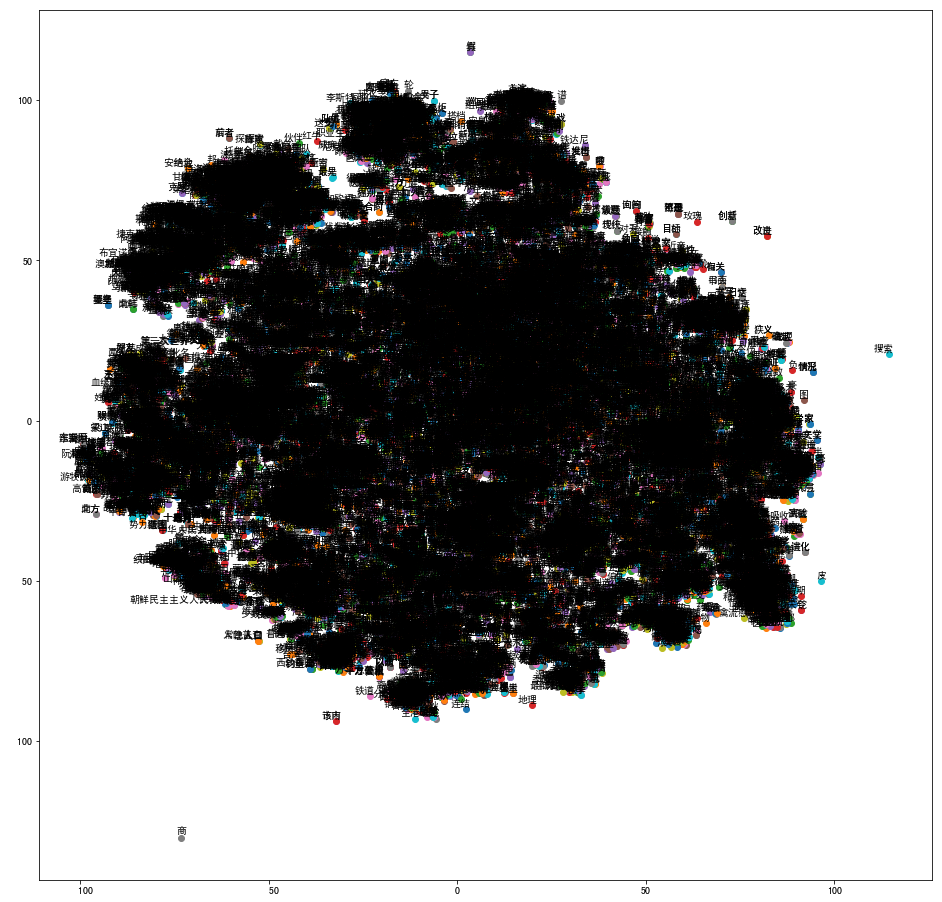

In [46]:
tsne_plot(tsne_model)